# Correcting for Bias in Limited Winrate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def simulate_draft(PQ, mu_DQ, sigma_DQ, score):
    global goal_reached
    DQ = np.random.normal(mu_DQ, sigma_DQ)
    wins = 0
    losses = 0
    
    while wins < max_wins and losses < max_losses:
        win_prob = 0.5 * PQ + 0.5 * DQ
        
        if np.random.random() < win_prob:
            score += 1 
            wins += 1
        else:
            score -= 1
            losses += 1
            score = max(0, score)
        
        if score >= goal:
            goal_reached = True

    return wins, losses, score

# Run the Monte Carlo simulation
def monte_carlo_simulation(num_drafts, PQ, mu_DQ, sigma_DQ):
    total_wins = 0
    total_games = 0
    score = 0
    
    for draft_num in range(num_drafts):
        wins, losses, score = simulate_draft(PQ, mu_DQ, sigma_DQ, score)
        total_wins += wins
        total_games += wins + losses
        
        #if goal_reached:
            #break
    
    observed_winrate = total_wins / total_games
    return observed_winrate

# Run the simulation multiple times for different numbers of drafts
def run_simulation_for_range(num_trials, max_drafts, PQ, mu_DQ, sigma_DQ):
    winrates = []
    
    for num_drafts in tqdm(range(12, max_drafts + 12), desc="Simulating Drafts"):
        trial_winrates = []
        
        for _ in range(num_trials):

            # Reset the global variable each time
            global goal_reached
            goal_reached = False
            
            # Run the simulation for the current number of drafts
            winrate = monte_carlo_simulation(num_drafts, PQ, mu_DQ, sigma_DQ)
            trial_winrates.append(winrate)
        
        # Compute the average winrate across trials for this draft number
        avg_winrate = np.mean(trial_winrates)
        winrates.append(avg_winrate)
    
    return winrates

# Define parameters
PQ = 0.5  # Play quality (fixed)
mu_DQ = 0.5  # Mean deck quality (slightly below average)
sigma_DQ = 0.2  # Variance in deck quality
num_trials = 50  # Number of simulations to run for each value of num_drafts
max_wins = 7
max_losses = 3
goal = 40  # Target score
max_drafts = 500  # Maximum number of drafts to simulate

# Run the simulation and store results
winrates = run_simulation_for_range(num_trials, max_drafts, PQ, mu_DQ, sigma_DQ)




Simulating Drafts: 100%|██████████| 500/500 [00:24<00:00, 20.02it/s]


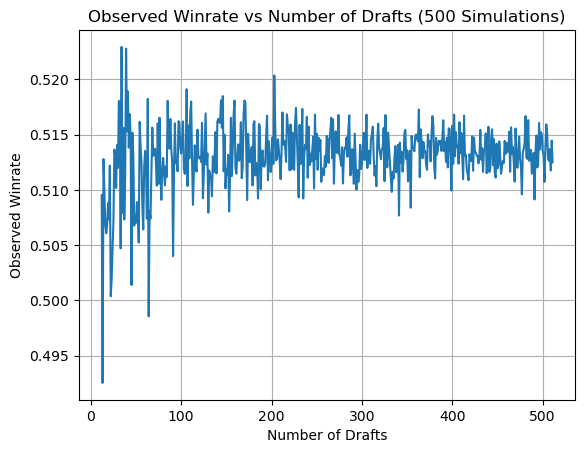

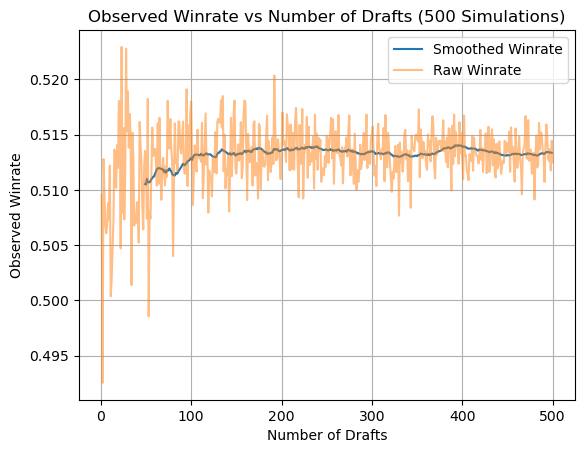

0.5132272278444262
0.513060907997159


In [2]:

# Plot the results
plt.plot(range(12, max_drafts + 12), winrates)
plt.xlabel('Number of Drafts')
plt.ylabel('Observed Winrate')
plt.title('Observed Winrate vs Number of Drafts (500 Simulations)')
plt.grid(True)
plt.show()

# Function to calculate the moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Smooth the winrates using a moving average
window_size = 50  # Adjust window size as needed
smoothed_winrates = moving_average(winrates, window_size)

# Plot the results
plt.plot(range(window_size - 1, max_drafts), smoothed_winrates, label='Smoothed Winrate')
plt.plot(range(1, max_drafts + 1), winrates, alpha=0.5, label='Raw Winrate')
plt.xlabel('Number of Drafts')
plt.ylabel('Observed Winrate')
plt.title('Observed Winrate vs Number of Drafts (500 Simulations)')
plt.grid(True)
plt.legend()
plt.show()

# Print the mean of the smoothed winrates
print(np.mean(smoothed_winrates))
print(np.mean(winrates))
